In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy.random as rnd
import os
from datetime import datetime

In [4]:
aadata = pd.read_csv('data/AviationData.txt',
                    delimiter='|',
                    skiprows=1,
                    names=['id', 'type', 'number', 'date',
       'location', 'country', 'lat', 'long', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_cat', 'reg_no', 'make', 'model',
       'amateur_built', 'no_engines', 'engine_type', 'FAR_desc',
       'schedule', 'purpose', 'air_carrier', 'fatal',
       'serious', 'minor', 'uninjured',
       'weather', 'broad_phase', 'report_status',
       'pub_date', 'none'])

In [6]:
aadata.columns

Index(['id', 'type', 'number', 'date', 'location', 'country', 'lat', 'long',
       'airport_code', 'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_cat', 'reg_no', 'make', 'model', 'amateur_built',
       'no_engines', 'engine_type', 'FAR_desc', 'schedule', 'purpose',
       'air_carrier', 'fatal', 'serious', 'minor', 'uninjured', 'weather',
       'broad_phase', 'report_status', 'pub_date', 'none'],
      dtype='object')

In [19]:
selection = aadata['date'] != '  ' 
#2space
aadata = aadata[selection]

In [20]:
aadata['datetime'] = [datetime.strptime(x, ' %m/%d/%Y ') for x in aadata['date']]

In [21]:
aadata['month'] = [int(x.month) for x in aadata['datetime']]
aadata['year'] = [int(x.year) for x in aadata['datetime']]

In [24]:
def decyear(date):
    start = datetime(year=date.year, month=1, day=1)
    end = datetime(year=date.year+1, month=1, day=1)
    decimal = (date - start)/(end - start)
    return date.year + decimal

In [25]:
aadata['decyear'] = aadata['datetime'].apply(decyear)

In [26]:
cols = ['lat', 'long',
       'fatal',
       'serious',
       'minor',
       'uninjured']
aadata[cols] = aadata[cols].applymap(
    lambda x: np.nan if isinstance(x, str) and x.isspace() else float(x))

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlablel'

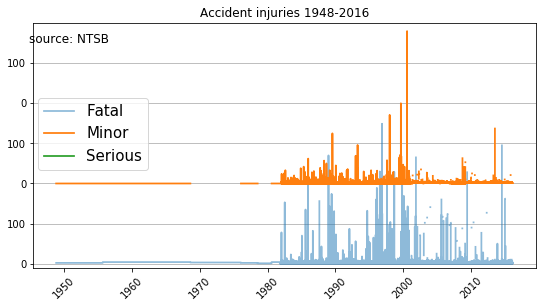

In [28]:
plt.figure(figsize=(9, 4.5))
plt.step(aadata['decyear'], aadata['fatal'],
        lw=1.75, where='mid', alpha=0.5, label='Fatal')
plt.step(aadata['decyear'], aadata['minor']+200,
        lw=1.75, where='mid', label='Minor')
plt.step(aadata['decyear'], aadata['serious']+2000*2,
        lw=1.75, where='mid', label='Serious')
plt.xticks(rotation=45)
plt.legend(loc=(0.01, .4), fontsize=15)
plt.ylim(-10, 600)
plt.grid(axis='y')
plt.title('Accident injuries {0}-{1}'.format(aadata['year'].min(), aadata['year'].max()))
plt.text(0.15, 0.92, 'source: NTSB', size=12, transform=plt.gca().transAxes, ha='right')
plt.yticks(np.arange(0, 600, 100), [0, 100, 0, 100, 0, 100])
plt.xlablel('Year')
plt.ylabel('No injuries recorded')
plt.xlim((aadata['decyear'].min()-0.5, aadata['decyear'].max()+0.5))

(array([1974., 1976., 1978., 1980., 1982., 1984., 1986., 1988.]),
 <a list of 8 Text xticklabel objects>)

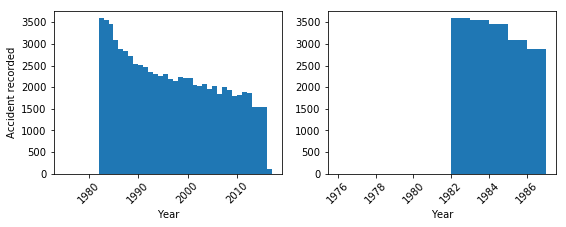

In [31]:
plt.figure(figsize=(9,3))
plt.subplot(121)
year_selection = (aadata['year']>=1975) & (aadata['year']<=2016)
plt.hist(aadata[year_selection]['year'].values, bins=np.arange(1975, 2016+2, 1), align='mid')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Accident recorded')
plt.subplot(122)
year_selection = (aadata['year'] >=1976) & (aadata['year']<=1986)
plt.hist(aadata[year_selection]['year'].values, bins=np.arange(1976, 1986+2, 1), align='mid')
plt.xlabel('Year')
plt.xticks(rotation=45)

In [32]:
aadata[aadata['year']<=1981]

,id,type,number,date,location,country,lat,long,airport_code,airport_name,...,uninjured,weather,broad_phase,report_status,pub_date,none,datetime,month,year,decyear
77960,20001218X45446,Accident,CHI81LA106,08/01/1981,"COTTON, MN",United States,NaN,NaN,,,...,0.0,IMC,UNKNOWN,Probable Cause,11/06/2001,,1981-08-01,8,1981,1981.580822
77961,20041105X01764,Accident,CHI79FA064,08/02/1979,"Canton, OH",United States,NaN,NaN,,,...,NaN,VMC,APPROACH,Probable Cause,04/16/1980,,1979-08-02,8,1979,1979.583562
77962,20001218X45448,Accident,LAX96LA321,06/19/1977,"EUREKA, CA",United States,NaN,NaN,,,...,0.0,IMC,CRUISE,Probable Cause,09/12/2000,,1977-06-19,6,1977,1977.463014
77963,20061025X01555,Accident,NYC07LA005,08/30/1974,"Saltville, VA",United States,36.922223,-81.878056,,,...,NaN,IMC,CRUISE,Probable Cause,02/26/2007,,1974-08-30,8,1974,1974.660274
77964,20001218X45447,Accident,LAX94LA336,07/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,,,...,0.0,UNK,UNKNOWN,Probable Cause,09/19/1996,,1962-07-19,7,1962,1962.545205
77965,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,,,...,0.0,UNK,CRUISE,Probable Cause,,,1948-10-24,10,1948,1948.811475


In [33]:
aadata = aadata[aadata['year']>1981]

(1981.5, 2016.6311475409836)

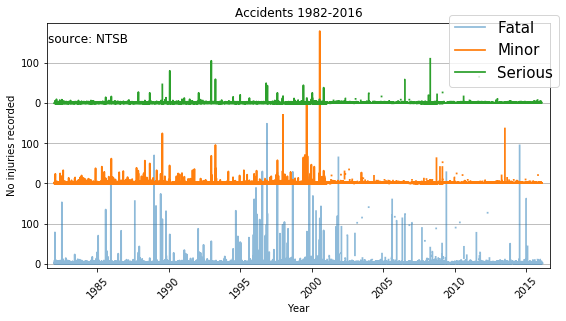

In [36]:
plt.figure(figsize=(9,4.5))
plt.step(aadata['decyear'], aadata['fatal'],
        lw=1.75, where='mid', alpha=0.5, label='Fatal')
plt.step(aadata['decyear'], aadata['minor']+200,
        lw=1.75, where='mid', label='Minor')
plt.step(aadata['decyear'], aadata['serious']+200*2,
        lw=1.75, where='mid', label='Serious')
plt.xticks(rotation=45)
plt.legend(loc=(0.8, 0.74), fontsize=15)
plt.ylim(-10, 600)
plt.grid(axis='y')
plt.title('Accidents {0}-{1}'.format(aadata['year'].min(), aadata['year'].max()))
plt.text(0.16, 0.92, 'source: NTSB', size=12, transform=plt.gca().transAxes, ha='right')
plt.yticks(np.arange(0, 600, 100), [0, 100, 0, 100, 0, 100])
plt.xlabel('Year')
plt.ylabel('No injuries recorded')
plt.xlim((aadata['decyear'].min()-0.5, aadata['decyear'].max()+0.5))

In [37]:
bins = np.arange(aadata.year.min(), aadata.year.max()+1, 1)
yearly_dig = aadata.groupby(np.digitize(aadata.year, bins))

In [38]:
yearly_dig.mean().head()

,lat,long,fatal,serious,minor,uninjured,month,year,decyear
1,30.757778,-88.355555,0.443978,0.203699,0.279474,2.317168,6.488450,1982.0,1982.495213
2,47.080556,-117.368611,0.358996,0.190059,0.296213,4.258810,6.652137,1983.0,1983.508864
3,NaN,NaN,0.356749,0.202322,0.303919,3.621739,6.553659,1984.0,1984.502076
4,NaN,NaN,0.534198,0.198379,0.359507,3.663855,6.477390,1985.0,1985.494267
5,NaN,NaN,0.410435,0.215454,0.338097,4.138531,6.480556,1986.0,1986.495181


In [39]:
np.floor(yearly_dig['year'].mean()).values

array([1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.])

In [54]:
def plot_trend(groups, fields=['Fatal'], which='year', what='max'):
    fig, ax = plt.subplots(1,1, figsize=(9, 3.5))
    x = np.floor(groups.mean()[which.lower()]).values
    width = 0.9
    colors = ['LightSalmon', 'SteelBlue', 'Green']
    bottom = np.zeros(len(groups.max()[fields[0].lower()]))
    for i in range(len(fields)):
        if what == 'max':
            ax.bar(x, groups.max()[fields[int(i)].lower()],
                  width, color=colors[int(i)], label=fields[int(i)],
                  align='center', bottom=bottom, zorder=4)
            bottom += groups.max()[fields[int(i)].lower()].values
        elif what == 'mean':
            ax.bar(x, groups.mean()[fields[int(i)].lower()],
                  align='center', bottom=bottom, zorder=4)
            bottom += groups.mean([fileds[int(i)].lower()].values)
    ax.legend(loc=2, ncol=2, frameon=False)
    ax.grid(b=True, which='major', axis='y', color='0.65', linestyle='-', zorder=-1)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    for tic1, tic2 in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
        tic1.tick10n = tic1.tick20n = False
        tic2.tick10n = tic2.tick20n = False
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_color('w')
    xticks = np.arange(x.min(), x.max()+1, 1)
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(int(x)) for x in xticks])
    fig.autofmt_xdate(rotation=90, ha='center')
    ax.set_xlim((xticks.min()-1.5, xticks.max()+0.5))
    ax.set_ylim(0, bottom.max()*1.15)
    if what == 'max':
        ax.set_title('Plane accidents maximu injuries')
        ax.set_ylabel('Max value')
    elif waht == 'mean':
        ax.set_title('Plane accdients mean injuries')
        ax.set_ylabel('Mean value')
    ax.set_xlabel(str(which))
    return ax

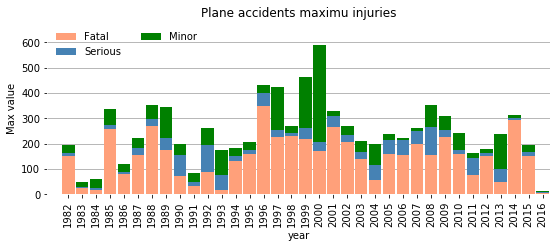

In [55]:
ax = plot_trend(yearly_dig, fields=['Fatal', 'Serious', 'Minor'], which='year')

In [74]:
import pymc
from pymc import Matplot as mcplt

In [91]:
x = np.floor(yearly_dig.mean()['year']).values
y = yearly_dig.max()['fatal'].values

In [92]:
def model_fatalities(y=y): 
    s = pymc.DiscreteUniform('s', lower=5, upper=18, value=14)
    e = pymc.Exponential('e', beta=1.)
    l = pymc.Exponential('l', beta=1.)

    @pymc.deterministic(plot=False)
    def m(s=s, e=e, l=l):
        meanval = np.empty(len(y))
        meanval[:s] = e
        meanval[s:] = l 
        return meanval
    D = pymc.Poisson('D', mu=m, value=y, observed=True)
    return locals()

In [93]:
np.random.seed(1234)
MDL = pymc.MCMC(model_fatalities(y=y))

In [94]:
MDL.sample(5e4, 5e3, 2)

 [-----------------100%-----------------] 50000 of 50000 complete in 4.8 sec

In [95]:
MDL.step_method_dict

{<pymc.distributions.new_dist_class.<locals>.new_class 's' at 0x7f9c05f7ba20>: [<pymc.StepMethods.DiscreteMetropolis at 0x7f9c05f7b4e0>],
 <pymc.distributions.new_dist_class.<locals>.new_class 'e' at 0x7f9c05f7b048>: [<pymc.StepMethods.Metropolis at 0x7f9c05f7b3c8>],
 <pymc.distributions.new_dist_class.<locals>.new_class 'l' at 0x7f9c05f7b8d0>: [<pymc.StepMethods.Metropolis at 0x7f9c05f7b0b8>]}

In [96]:
early = MDL.stats()['e']['mean']
earlyerr = MDL.stats()['e']['standard deviation']
late = MDL.stats()['l']['mean']
lateerr = MDL.stats()['l']['standard deviation']

spt = MDL.stats()['s']['mean']
spterr = MDL.stats()['s']['standard deviation']

Plotting s
Plotting e
Plotting l


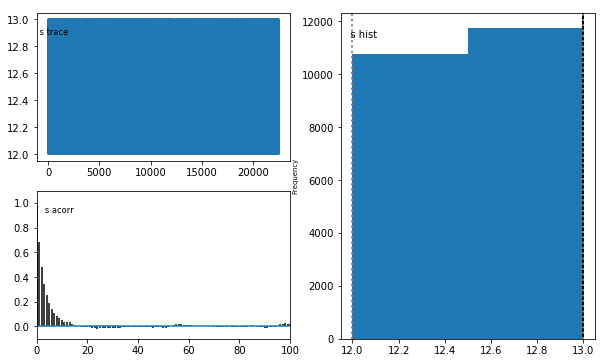

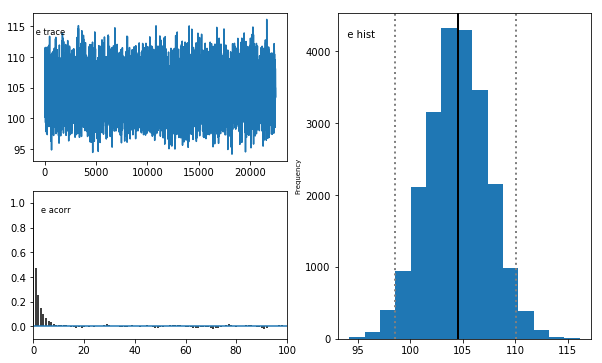

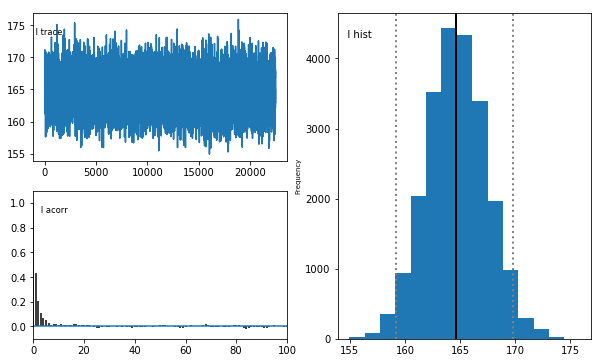

In [97]:
mcplt.plot(MDL)

Plotting l


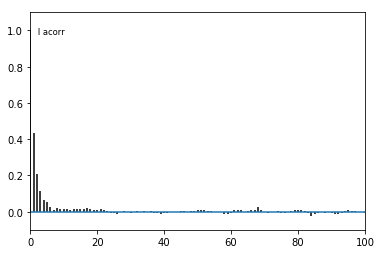

In [98]:
mcplt.autocorrelation(MDL.l)

In [99]:
s = int(np.floor(spt))
print(spt, spterr, x[s])

12.521511111111112 0.4995370577832694 1994.0


Text(1994,300,'1994')

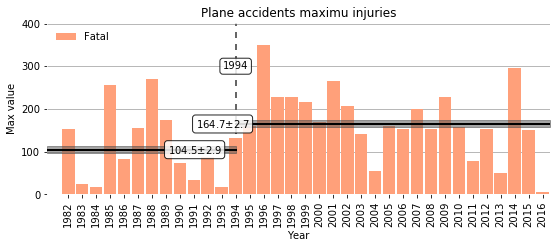

In [101]:
ax = plot_trend(yearly_dig,  fields=['Fatal'], which='Year')
ax.plot([x[0]-1.5, x[s]], [early, early], 'k', lw=2, zorder=5)
ax.fill_between([x[0]-1.5, x[s]], [early-3*earlyerr, early-3*earlyerr], [early+3*earlyerr, early+3*earlyerr], color='0.3', alpha=0.5, zorder=5)
ax.plot([x[s], x[-1]+0.5], [late, late], 'k', lw=2, zorder=5)
ax.fill_between([x[s], x[-1]+0.5],
               [late-3*lateerr, late-3*lateerr],
               [late+3*lateerr, late+3*lateerr],
               color ='0.3', alpha=0.5, zorder=5)
ax.axvline(int(x[s]), color='0.4', dashes=(3,3), lw=2)
bbox_args = dict(boxstyle='round', fc='w', alpha=0.85)
ax.annotate('{0:.1f}$\pm${1:.1f}'.format(early, earlyerr),
           xy = (x[s]-1, early),
           bbox = bbox_args, ha='right', va='center', zorder=5)
ax.annotate('{0:.1f}$\pm${1:.1f}'.format(late, lateerr),
           xy = (x[s]+1, late),
           bbox = bbox_args, ha='right', va='center', zorder=5)
ax.annotate('{0}'.format(int(x[s])), xy = (int(x[s]), 300), bbox = bbox_args, ha='center', va='center', zorder=5)

In [102]:
bins = np.arange(1, 12+1, 1)
monthly_dig = aadata.groupby(np.digitize(aadata.month, bins))

In [103]:
monthly_dig.mean().head()

,lat,long,fatal,serious,minor,uninjured,month,year,decyear
1,35.355070,-91.799283,1.024984,0.351452,0.482369,7.505215,1.0,1996.595841,1996.637186
2,35.211711,-92.921433,0.890277,0.295262,0.486586,6.861646,2.0,1996.190641,1996.313377
3,36.439443,-93.719725,0.673851,0.281289,0.428362,6.491056,3.0,1996.299847,1996.503531
4,37.187038,-93.330245,0.651183,0.304870,0.489868,5.455664,4.0,1996.292600,1996.579883
5,37.816921,-94.954229,0.671199,0.272957,0.445699,5.194848,5.0,1996.382683,1996.754983


(0.5, 12.5)

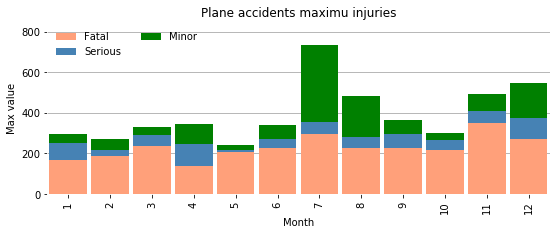

In [104]:
ax = plot_trend(monthly_dig, fields=['Fatal', 'Serious', 'Minor'], which='Month')
ax.set_xlim(0.5, 12.5)

In [105]:
lats, lons = aadata['lat'].values, aadata['long'].values

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


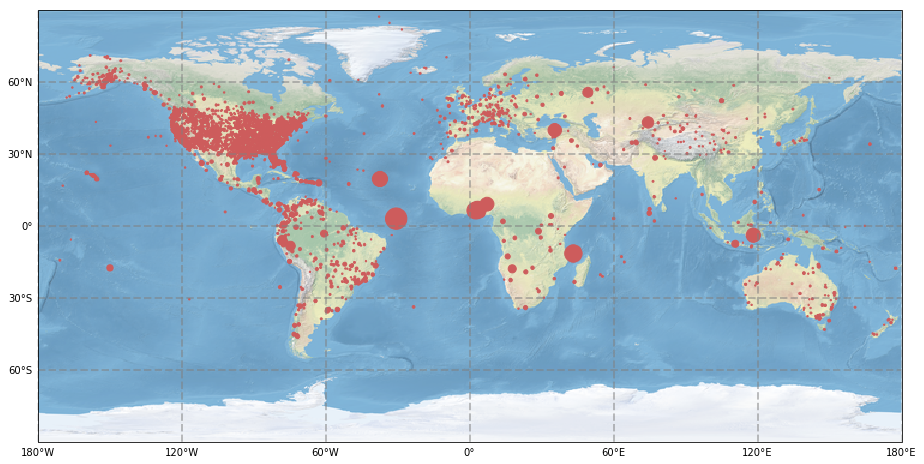

In [115]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(12, 10))
ax = fig.add_axes([0,0,1,1], projection=ccrs.PlateCarree())
ax.stock_img()
ax.scatter(aadata['long'], aadata['lat'], color='IndianRed', s=aadata['fatal']*2, transform=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180+1, 60))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [120]:
import os

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

NameError: name 'conda' is not defined

In [123]:
co2_gr = pd.read_csv('data/co2_gr_gl.txt',
                    delim_whitespace=True,
                    skiprows=62,
                    names=['year', 'rate', 'err'])
co2_now = pd.read_csv('data/co2_annmean_gl.txt',
                     delim_whitespace=True,
                     skiprows=57,
                     names=['year', 'co2', 'err'])
co2_200 = pd.read_csv('data/siple2.013.dat',
                     delim_whitespace=True,
                     skiprows=36,
                     names=['depth', 'year', 'co2'])
co2_1000 = pd.read_csv('data/lawdome.smoothed.yr75.dat',
                      delim_whitespace=True,
                      skiprows=22,
                      names=['year', 'co2'])

In [124]:
co2_200.tail()

,depth,year,co2
20,86.80,1943,307.9
21,81.22,1953,312.7
22,Data,in,the
23,table,were,published
24,CO2,concentrations,are


In [125]:
co2_200 = co2_200[:-3]

In [126]:
print(co2_200['year'].dtype, co2_1000['co2'].dtype, co2_now['co2'].dtype, co2_gr['rate'].dtype)

object float64 float64 float64


In [127]:
co2_200['year'] = pd.to_numeric(co2_200['year'])
co2_200['co2'] = pd.to_numeric(co2_200['co2'])
co2_200['co2'].dtype, co2_200['year'].dtype

(dtype('float64'), dtype('int64'))

1959


Text(0.5,1,'Growth rate since 1960')

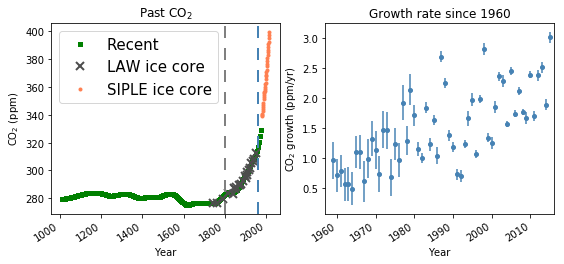

In [131]:
fig,axs = plt.subplots(1,2, figsize=(9, 3.5))
ax2 = axs[0]
ax2.errorbar(co2_now['year'], co2_now['co2'],
            color='Coral',
            ls='None',
            elinewidth=1,
            capthick=1.5,
            marker='.',
            ms=6)

ax2.plot(co2_1000['year'], co2_1000['co2'],
        color='Green',
        ls='None',
        marker='s', mew=0,
        ms=5)
ax2.plot(co2_200['year'], co2_200['co2'],
       color='0.3',
       ls='None',
       marker='x', mew=2,
       ms=8)
ax2.legend(['Recent', 'LAW ice core', 'SIPLE ice core'], fontsize=15, loc=2)
ax2.axvline(1800, lw=2, color='Gray', dashes=(6,5))
ax2.axvline(co2_gr['year'][0], lw=2, color='SteelBlue', dashes=(6,5))
print(co2_gr['year'][0])
labels = ax2.get_xticklabels()
plt.setp(labels, rotation=33, ha='right')
ax2.set_ylabel('CO$_2$ (ppm)')
ax2.set_xlabel('Year')
ax2.set_title('Past CO$_2$')

ax1 = axs[1]
ax1.errorbar(co2_gr['year'], co2_gr['rate'],
            yerr=co2_gr['err'],
            color='SteelBlue',
            ls='None',
            elinewidth=1.5,
            capthick=1.5,
            marker='.',
            ms=8)

labels = ax1.get_xticklabels()
plt.setp(labels, rotation=33, ha='right')
ax1.set_ylabel('CO$_2$ growth (ppm/yr)')
ax1.set_xlabel('Year')
ax1.set_xlim((1957, 2016))
ax1.set_title('Growth rate since 1960')


Text(0,0.5,'Count')

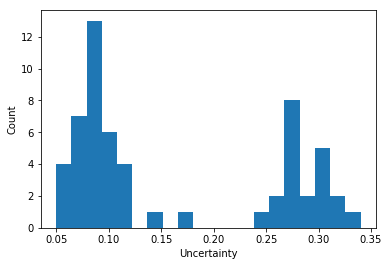

In [132]:
_ = plt.hist(co2_gr['err'], bins=20)
plt.xlabel('Uncertainty')
plt.ylabel('Count')

In [141]:
x = co2_gr['year'].values
y = co2_gr['rate'].values
y_error = co2_gr['err'].values

[1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]


In [142]:
def model(x, y): 
    slope = pymc.Normal('slope', 0.1, 1.)
    intercept = pymc.Normal('intercept', -50., 10.)
    @pymc.deterministic(plot=False)
    def linear(x=x, slope=slope, intercept=intercept):
        return x * slope + intercept
    f = pymc.Normal('f', mu=linear, tau=1.0/y_error, value=y, observed=True)
    return locals()

In [144]:
MDL = pymc.MCMC(model(x,y))
MDL.sample(5e5, 5e4, 100)

 [-----------------100%-----------------] 500000 of 500000 complete in 23.3 sec

In [147]:
y_min = MDL.stats()['linear']['quantiles'][2.5]
y_max = MDL.stats()['linear']['quantiles'][97.5]
y_fit = MDL.stats()['linear']['mean']
slope = MDL.stats()['slope']['mean']
slope_err = MDL.stats()['slope']['standard deviation']
intercept = MDL.stats()['intercept']['mean']
intercept_err = MDL.stats()['intercept']['standard deviation']

Plotting intercept
Plotting slope


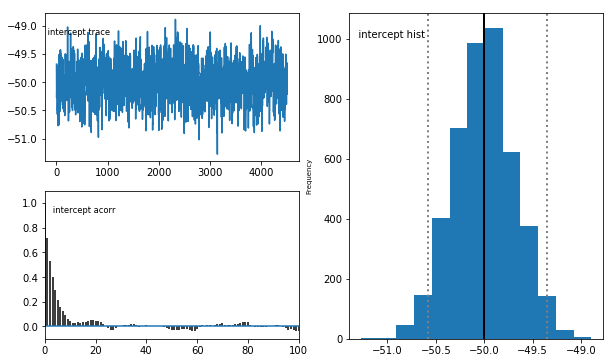

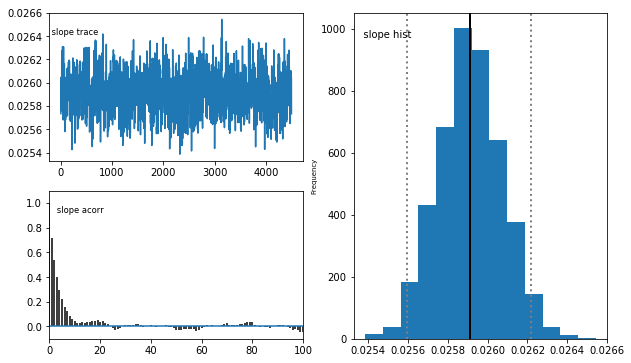

In [148]:
mcplt.plot(MDL)

In [149]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
ols_results = smf.ols("rate ~ year", co2_gr).fit()

In [150]:
prstd, iv_l , iv_u = wls_prediction_std(ols_results)
ols_params = np.flipud(ols_results.params)
ols_err = np.flipud(np.diag(ols_results.cov_params())**.5)

In [151]:
print ('OLS: slope:{0:.3f}, intercept:{1:.2f}'.format(*ols_params))
print('Bay: slope:{0:.3f}, intercept:{1:.2f}'.format(slope, intercept))

OLS: slope:0.027, intercept:-51.81
Bay: slope:0.026, intercept:-50.00


In [152]:
ols_results.conf_int(alpha=0.05)

,0,1
Intercept,-66.531103,-37.092365
year,0.019425,0.034240


In [153]:
MDL.stats(['intercept', 'slope'])

{'intercept': {'n': 4500,
  'standard deviation': 0.3167930281826082,
  'mean': -50.00172660103324,
  '95% HPD interval': array([-50.58491908, -49.35564136]),
  'mc error': 0.01161147321897672,
  'quantiles': {2.5: -50.621516888088046,
   25: -50.212981657345345,
   50: -49.99837375123095,
   75: -49.793025947131255,
   97.5: -49.37882016221209}},
 'slope': {'n': 4500,
  'standard deviation': 0.00016041998925512944,
  'mean': 0.02591244399665757,
  '95% HPD interval': array([0.0255958, 0.0262164]),
  'mc error': 5.892259283734418e-06,
  'quantiles': {2.5: 0.02560155192480358,
   25: 0.025807678619097538,
   50: 0.025911313478562497,
   75: 0.026021368309838793,
   97.5: 0.026224900377037244}}}

In [ ]:
plt.figure = (figsize=(8,4))
plt.title('Growth rate since 1960')
plt.errorbar(x, y, yerr=y_error,
            color='SteelBlue', ls='None',
            elinewidth=1.5, capthick=1.5,
            marker='.', ms=8,
            label='Observed')
plt.xlabel('Year')
plt.ylabel('CO$_2$ growth rate (ppm/yr)')
plt.plot(x, y_fit, 'k', lw=2, label='pymc')
plt.fill_between(x, y_min, y_max,
                color='0.5', alpha=0.5,
                label='Uncertainty')
plt.plot([x.min(), x.max()], [ols_results.fittedvalues.min(), ols_results.fittedvalues.max()],
        'r', dashes=(13,2), lw=1.5, label)